## Creating a logistic regression to predict absenteeism

### importing the libraries

In [1]:
import pandas as pd
import numpy as np

### load the data

In [2]:
data_preprocessed=pd.read_csv('Absenteeism_preprocessed.csv')

In [3]:
data_preprocessed.head()

,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4,Month Value,Weekday,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


### Creating the targets

In [4]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [5]:
targets=np.where(data_preprocessed['Absenteeism Time in Hours']>
                 data_preprocessed['Absenteeism Time in Hours'].median(),1,0)

In [6]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [7]:
data_preprocessed["Excessive Absenteeism"]=targets

In [8]:
data_preprocessed.head()

,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4,Month Value,Weekday,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [9]:
#checking if data is balanced
targets.sum()/targets.shape[0]

0.45571428571428574

#### 46% data is 1 and rest is 0 it's close to balance

In [10]:
data_with_targets=data_preprocessed.drop(["Absenteeism Time in Hours",'Weekday','Distance to Work','Daily Work Load Average'],axis=1)

In [11]:
data_with_targets.head()

,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0


### Select the inputs for th regresion

In [12]:
unscaled_inputs=data_with_targets.iloc[:,:-1]

### Standardize the data

In [13]:
# standardize the inputs


from sklearn.preprocessing import StandardScaler



# here's the full documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# define scaler as an object
absenteeism_scaler = StandardScaler()

In [14]:
# import the libraries needed to create the Custom Scaler


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler()
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]


In [15]:
unscaled_inputs.columns.values

array(['Reason Type 1', 'Reason Type 2', 'Reason Type 3', 'Reason Type 4',
       'Month Value', 'Transportation Expense', 'Age', 'Body Mass Index',
       'Education', 'Children', 'Pets'], dtype=object)

In [16]:
# select the columns to omit
columns_to_omit = ['Reason Type 1', 'Reason Type 2', 'Reason Type 3',
                      'Reason Type 4','Education']

In [17]:
# create the columns to scale, based on the columns to omit

columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [18]:
absenteeism_scaler=CustomScaler(columns_to_scale)

In [19]:
absenteeism_scaler.fit(unscaled_inputs)

CustomScaler(columns=['Month Value', 'Transportation Expense', 'Age',
                      'Body Mass Index', 'Children', 'Pets'])

In [20]:
# standardizes the data, using the transform method 
 in the same way as now
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [21]:
scaled_inputs

,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.182726,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.182726,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.182726,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.388293,-0.654143,0.562059,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,-0.388293,0.040034,-1.320435,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,-0.388293,1.624567,-1.320435,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,-0.388293,0.190942,-0.692937,-0.408580,1,-0.919030,-0.589690


In [22]:
scaled_inputs.shape

(700, 11)

### Training and Testing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,targets,test_size=0.2,
                                               shuffle=True,random_state=20)

In [25]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(560, 11) (560,)
(140, 11) (140,)


### Logistic Regression with sklearn

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Training the model

In [27]:
reg=LogisticRegression()

In [28]:
reg.fit(x_train,y_train)

LogisticRegression()

In [29]:
reg.score(x_train,y_train)

0.7732142857142857

### Manually check the accuracy

In [30]:
model_outputs=reg.predict(x_train)
model_outputs

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [31]:
y_train

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [32]:
model_outputs==y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [33]:
np.sum(model_outputs==y_train)

433

In [34]:
model_outputs.shape[0]

560

In [35]:
model_accuracy=np.sum(model_outputs==y_train)/model_outputs.shape[0]

In [36]:
model_accuracy

0.7732142857142857

### Coeffecient

In [37]:
reg.intercept_

array([-1.6474549])

In [38]:
reg.coef_

array([[ 2.80019733,  0.95188356,  3.11555338,  0.83900082,  0.1589299 ,
         0.60528415, -0.16989096,  0.27981088, -0.21053312,  0.34826214,
        -0.27739602]])

In [39]:
unscaled_inputs.columns.values

array(['Reason Type 1', 'Reason Type 2', 'Reason Type 3', 'Reason Type 4',
       'Month Value', 'Transportation Expense', 'Age', 'Body Mass Index',
       'Education', 'Children', 'Pets'], dtype=object)

In [40]:
feature_name=unscaled_inputs.columns.values
summary_table=pd.DataFrame(columns=['Feature name'],data=feature_name)
summary_table["coefficient"]=np.transpose(reg.coef_)

In [41]:
summary_table

,Feature name,coefficient
0,Reason Type 1,2.800197
1,Reason Type 2,0.951884
2,Reason Type 3,3.115553
3,Reason Type 4,0.839001
4,Month Value,0.158930
5,Transportation Expense,0.605284
6,Age,-0.169891
7,Body Mass Index,0.279811
8,Education,-0.210533
9,Children,0.348262


In [42]:
summary_table.index+=1
summary_table.loc[0]=['Intercept',reg.intercept_[0]]
summary_table=summary_table.sort_index()

In [43]:
summary_table

,Feature name,coefficient
0,Intercept,-1.647455
1,Reason Type 1,2.800197
2,Reason Type 2,0.951884
3,Reason Type 3,3.115553
4,Reason Type 4,0.839001
5,Month Value,0.158930
6,Transportation Expense,0.605284
7,Age,-0.169891
8,Body Mass Index,0.279811
9,Education,-0.210533


### Interpreting the coefficients

In [44]:
summary_table['Odds_ratio']=np.exp(summary_table.coefficient)

In [45]:
summary_table

,Feature name,coefficient,Odds_ratio
0,Intercept,-1.647455,0.192539
1,Reason Type 1,2.800197,16.447892
2,Reason Type 2,0.951884,2.590585
3,Reason Type 3,3.115553,22.545903
4,Reason Type 4,0.839001,2.314054
5,Month Value,0.158930,1.172256
6,Transportation Expense,0.605284,1.831773
7,Age,-0.169891,0.843757
8,Body Mass Index,0.279811,1.322880
9,Education,-0.210533,0.810152


In [46]:
summary_table.sort_values('Odds_ratio',ascending=False)

,Feature name,coefficient,Odds_ratio
3,Reason Type 3,3.115553,22.545903
1,Reason Type 1,2.800197,16.447892
2,Reason Type 2,0.951884,2.590585
4,Reason Type 4,0.839001,2.314054
6,Transportation Expense,0.605284,1.831773
10,Children,0.348262,1.416604
8,Body Mass Index,0.279811,1.322880
5,Month Value,0.158930,1.172256
7,Age,-0.169891,0.843757
9,Education,-0.210533,0.810152



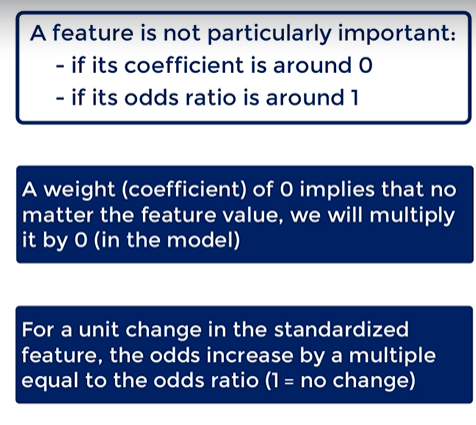
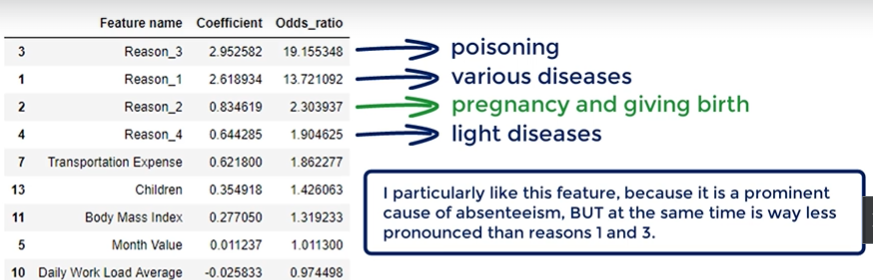
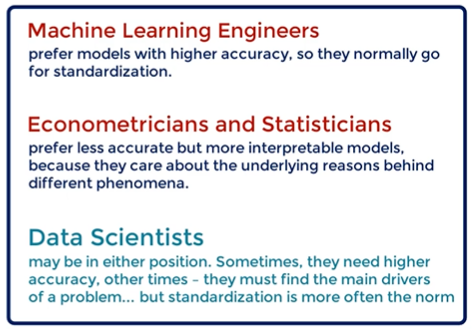

## Testing

In [47]:
reg.score(x_test,y_test) #test accuracy must be lower that train accuracy
#higher-lucky or mistake

0.75

In [48]:
predicted_proba=reg.predict_proba(x_test)
predicted_proba

array([[0.71340413, 0.28659587],
       [0.58724228, 0.41275772],
       [0.44020821, 0.55979179],
       [0.78159464, 0.21840536],
       [0.08410854, 0.91589146],
       [0.33487603, 0.66512397],
       [0.29984576, 0.70015424],
       [0.13103971, 0.86896029],
       [0.78625404, 0.21374596],
       [0.74903632, 0.25096368],
       [0.49397598, 0.50602402],
       [0.22484913, 0.77515087],
       [0.07129151, 0.92870849],
       [0.73178133, 0.26821867],
       [0.30934135, 0.69065865],
       [0.5471671 , 0.4528329 ],
       [0.55052275, 0.44947725],
       [0.5392707 , 0.4607293 ],
       [0.40201117, 0.59798883],
       [0.05361575, 0.94638425],
       [0.7003009 , 0.2996991 ],
       [0.78159464, 0.21840536],
       [0.42037128, 0.57962872],
       [0.42037128, 0.57962872],
       [0.24783565, 0.75216435],
       [0.74566259, 0.25433741],
       [0.51017274, 0.48982726],
       [0.85690195, 0.14309805],
       [0.20349733, 0.79650267],
       [0.78159464, 0.21840536],
       [0.

In [49]:
predicted_proba[:,-1]

array([0.28659587, 0.41275772, 0.55979179, 0.21840536, 0.91589146,
       0.66512397, 0.70015424, 0.86896029, 0.21374596, 0.25096368,
       0.50602402, 0.77515087, 0.92870849, 0.26821867, 0.69065865,
       0.4528329 , 0.44947725, 0.4607293 , 0.59798883, 0.94638425,
       0.2996991 , 0.21840536, 0.57962872, 0.57962872, 0.75216435,
       0.25433741, 0.48982726, 0.14309805, 0.79650267, 0.21840536,
       0.36956558, 0.67906035, 0.68502567, 0.52868083, 0.21840536,
       0.53506551, 0.22147081, 0.73692105, 0.40498044, 0.60505988,
       0.21075848, 0.45224466, 0.23751292, 0.39833498, 0.82755447,
       0.56797575, 0.69113325, 0.28659587, 0.21935267, 0.2033097 ,
       0.57628256, 0.3294664 , 0.66512397, 0.26949499, 0.83321968,
       0.43491525, 0.88374612, 0.23127072, 0.33415858, 0.34432939,
       0.69909345, 0.65494263, 0.29244941, 0.79200758, 0.20750276,
       0.26840558, 0.08708566, 0.22147081, 0.73245417, 0.30530219,
       0.22147081, 0.29014408, 0.90438191, 0.46061297, 0.60174

## Save the model

In [50]:
import pickle

In [51]:
with open('model','wb') as file:
    pickle.dump(reg,file)

In [52]:
with open('scaler','wb') as file:
    pickle.dump(absenteeism_scaler,file)

In [53]:
"""Pickle is not secure.

This is evident from the documentation of pickle, quote: “Never unpickle data received from an untrusted or unauthenticated source.” The reason is that just about anything can be pickled, so you can easily unpickle malicious code."""

'Pickle is not secure.\n\nThis is evident from the documentation of pickle, quote: “Never unpickle data received from an untrusted or unauthenticated source.” The reason is that just about anything can be pickled, so you can easily unpickle malicious code.'